<a href="https://colab.research.google.com/github/lclarete/DHUM72500-FINAL-PORTFOLIO/blob/main/Clarete_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5 Notebook
## Exploratory Analysis with Text Data
* Student Name: Livia Clarete
* Date: March 29 2023
* Assignment Due: March 2023
* Instructor: Lisa Rhody
* Methods of Text Analysis, Spring 2023

## Note: 
This week we are switching from the NLTK Book to using a companion Google Colab notebook for the O'Reilly series of books titled _Blueprints for Text Analytics Using Python_. This week, the reading is focused on the kinds of questions we can ask with text data, and so it's fitting for you to start learning what the preliminary process is for exploring a text corpus in order to begin thinking about waht questions could be asked of it. 

However, this notebook is not exactly the same as the one from the Blueprints book, because interspersed in between exercises are questions to answer. So, my recommendation is that you go through the PDF of the chapter in the Commons library while you work through this notebook. At the same time, you'll want to respond to the additional questions with the help of the readings from this week. 


[**Blueprints for Text Analysis Using Python**](https://github.com/blueprints-for-text-analytics-python/blueprints-text)  
Jens Albrecht, Sidharth Ramachandran, Christian Winkler

**If you like the book or the code examples here, please leave a friendly comment on [Amazon.com](https://www.amazon.com/Blueprints-Text-Analytics-Using-Python/dp/149207408X)!**
<img src="https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/rating.png?raw=1" width="100"/>


# Chapter 1:<div class='tocSkip'/>

# Gaining Early Insights from Textual Data

## Remark<div class='tocSkip'/>

The code in this notebook differs slightly from the printed book. For example we frequently use pretty print (`pp.pprint`) instead of `print` and `tqdm`'s `progress_apply` instead of Pandas' `apply`. 

Moreover, several layout and formatting commands, like `figsize` to control figure size or subplot commands are removed in the book.

You may also find some lines marked with three hashes ###. Those are not in the book as well as they don't contribute to the concept.

All of this is done to simplify the code in the book and put the focus on the important parts instead of formatting.

## Setup<div class='tocSkip'/>

Set directory locations. If working on Google Colab: copy files and install required libraries.

In [ ]:
import sys, os
ON_COLAB = 'google.colab' in sys.modules

if ON_COLAB:
    GIT_ROOT = 'https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master'
    os.system(f'wget {GIT_ROOT}/ch01/setup.py')

%run -i setup.py

You are working on Google Colab.
Files will be downloaded to "/content".
!wget -P /content https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/settings.py
!wget -P /content/data/un-general-debates https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/data/un-general-debates/un-general-debates-blueprint.csv.gz
!wget -P /content/ch01 https://github.com/blueprints-for-text-analytics-python/blueprints-text/raw/master/ch01/requirements.txt

Additional setup ...
!pip install -r ch01/requirements.txt


## Load Python Settings<div class="tocSkip"/>

Common imports, defaults for formatting in Matplotlib, Pandas etc.

In [ ]:
%run "$BASE_DIR/settings.py"

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'png'

## What you will learn and what we will build


# Exploratory Data Analysis


# Introducing the Dataset


In [ ]:
pd.options.display.max_colwidth = 150 ###
file = "un-general-debates-blueprint.csv"
file = f"{BASE_DIR}/data/un-general-debates/un-general-debates-blueprint.csv.gz" ### real location
df = pd.read_csv(file)
df.sample(2, random_state=53)

,session,year,country,country_name,speaker,position,text
3871,51,1996,PER,Peru,Francisco Tudela Van Breughel Douglas,Minister for Foreign Affairs,"﻿At the outset, allow me,\nSir, to convey to you and to this Assembly the greetings\nand congratulations of the Peruvian people, as well as\ntheir..."
4697,56,2001,GBR,United Kingdom,Jack Straw,Minister for Foreign Affairs,"﻿Please allow me\nwarmly to congratulate you, Sir, on your assumption of\nthe presidency of the fifty-sixth session of the General\nAssembly.\nThi..."


# Blueprint: Getting an Overview of the Data with Pandas


## Calculating Summary Statistics for Columns


In [ ]:
df['length'] = df['text'].str.len()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.00,49.61,12.89,25.00,39.00,51.00,61.00,70.00
year,7507.00,1994.61,12.89,1970.00,1984.00,1996.00,2006.00,2015.00
length,7507.00,17967.28,7860.04,2362.00,12077.00,16424.00,22479.50,72041.00


In [ ]:
df[['country', 'speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


## Checking for Missing Data


In [ ]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [ ]:
df['speaker'].fillna('unkown', inplace=True)

In [ ]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: speaker, dtype: int64

## Plotting Value Distributions


<Axes: >

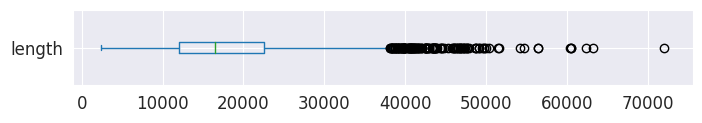

In [ ]:
df['length'].plot(kind='box', vert=False, figsize=(8, 1))

<Axes: ylabel='Frequency'>

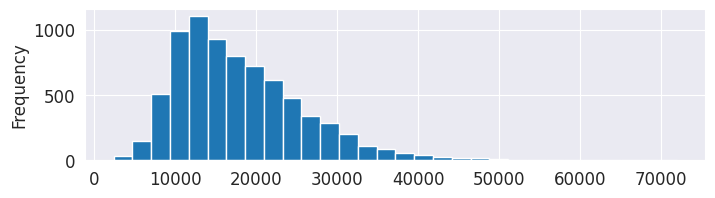

In [ ]:
df['length'].plot(kind='hist', bins=30, figsize=(8,2))

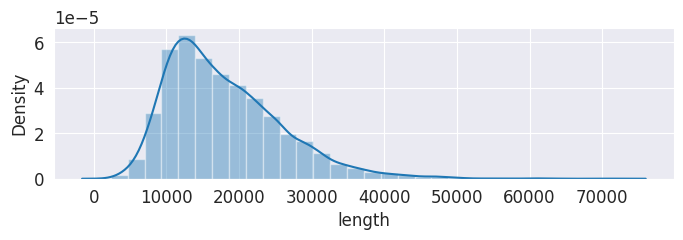

In [ ]:
# Not in book: seaborn plot with gaussian kernel density estimate
import seaborn as sns

plt.figure(figsize=(8, 2))
sns.distplot(df['length'], bins=30, kde=True);

## Question 1: 

In this section, you are learning how to get a general insight into the dataset by looking at its length, finding missing data types, and evaluating things that are duplicate values because there are multiple references or multiple forms of textual representation. What is the benefit to computational text analysis of blueprint or (as Salganick calls them, "readymades")? 

## Answer 1: 
Blueprints are pre-existing templates or models that can be used to analyze text data, without the need to develop a new analysis method from scratch, which can save time and effort in developing a new analysis method. It also facilitate the sharing and integration of text analysis methods and results across different research teams and disciplines.

## Comparing Value Distributions across Categories


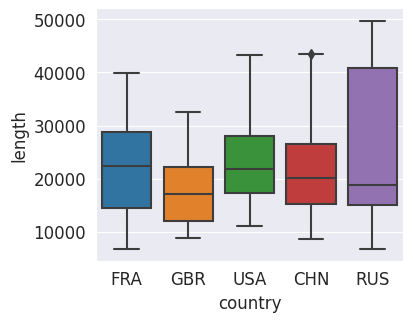

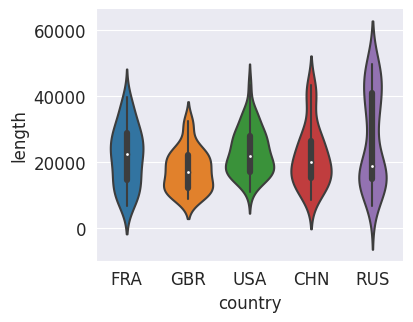

In [ ]:
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
g = sns.catplot(data=df[where], x="country", y="length", kind='box')
g.fig.set_size_inches(4, 3) ###
g.fig.set_dpi(100) ###
g = sns.catplot(data=df[where], x="country", y="length", kind='violin')
g.fig.set_size_inches(4, 3) ###
g.fig.set_dpi(100) ###

## Visualizing Developments over Time


<Axes: title={'center': 'Number of Countries'}, xlabel='year'>

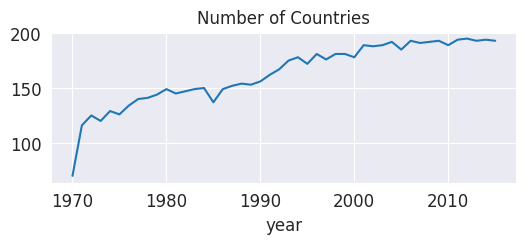

In [ ]:
df.groupby('year').size().plot(title="Number of Countries", figsize=(6,2))

<Axes: title={'center': 'Avg. Speech Length'}, xlabel='year'>

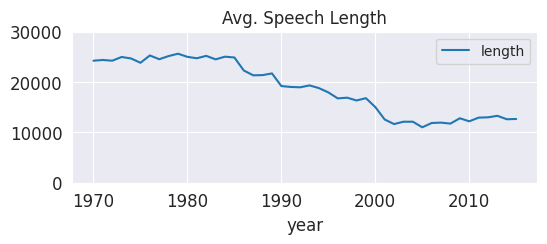

In [ ]:
df.groupby('year').agg({'length': 'mean'}) \
  .plot(title="Avg. Speech Length", ylim=(0,30000), figsize=(6,2))

## Question 2: 

What kinds of questions can you ask when you can visualize distributions or change? What kind of data do you need in order for these visualizations to work? How does access to or limitations of data such as categorical labels or years change the kind of questions you can ask? 

## Answer 2:
Asking questions about:
* Distribution of the data in general and from each category;
* Data trends over time and across different groups
* Relationship between the groups (correlations, similarities)
* Visualize distributions: counts, percentages, averages, and measures of variability.

# Blueprint: Building a Simple Text Preprocessing Pipeline


## Tokenization with Regular Expressions


In [ ]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [ ]:
text = "Let's defeat SARS-CoV-2 together in 2020!"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-CoV-2|together|in


## Treating Stop Words


In [ ]:
import nltk
# not in book: make sure stop words are available
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk

stopwords = set(nltk.corpus.stopwords.words('english'))

In [ ]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [ ]:
include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'against'}

stopwords |= include_stopwords
stopwords -= exclude_stopwords

## Question 3: 

In _Blueprints_, the authors are particularly careful to say that the way to remove stopwords isn't always a one-size-fits-all solution. Taking into consideration, DÍgnazio and Klein's chapter on "rational, scientific, objective viewpoints," when does it make sense to use standard stop word lists, and when should stop word lists be adjusted? 


## Answer 3: 
Stop word lists are a common tool in text analysis to remove words that are considered unimportant or ubiquitous, such as "the" and "and". Despite that, stop word lists may not always be a one-size-fits-all solution, as the relevance of words can depend on the specific research question and the characteristics of the data being analyzed. To decide the list of stop words we can:
* Double check the research question and see what are not relevant in the analysis
* Type of text: technical, common sense, etc: the use of standard stop word lists may not be appropriate because they may remove important domain-specific words.
* The language of the text: Stop word lists may need to be adjusted depending on the language of the text being analyzed, depending on grammatical structures that affect the relevance of certain words
* The analysis method: some text mining algorithms may be more sensitive to the presence of certain words, and removing them may affect the accuracy of the analysis.

## Processing a Pipeline with one Line of Code


In [ ]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [ ]:
df['tokens'] = df['text'].progress_apply(prepare, pipeline=pipeline)

  0%|          | 0/7507 [00:00<?, ?it/s]

In [ ]:
df['num_tokens'] = df['tokens'].progress_map(len)

  0%|          | 0/7507 [00:00<?, ?it/s]

# Blueprints for Word Frequency Analysis


## Blueprint: Counting Words with a Counter


In [ ]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")

counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [ ]:
more_tokens = tokenize("She likes dogs and cats.")
counter.update(more_tokens)
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [ ]:
counter = Counter()

_ = df['tokens'].map(counter.update)

In [ ]:
print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]


In [ ]:
from collections import Counter ###
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].progress_map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [ ]:
freq_df = count_words(df)
freq_df.head(5)

  0%|          | 0/7507 [00:00<?, ?it/s]

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


In [ ]:
# top words with 10+ characters
count_words(df, column='text', 
            preprocess=lambda text: re.findall(r"\w{10,}", text)).head(5)

  0%|          | 0/7507 [00:00<?, ?it/s]

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177


## Blueprint: Creating a Frequency Diagram


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

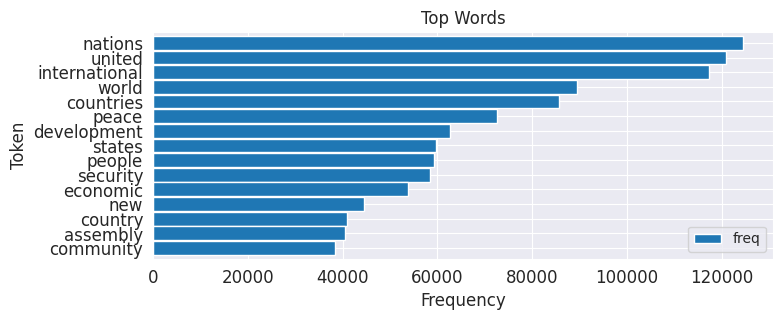

In [ ]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(8,3))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

## Blueprint: Creating Word Clouds


(-0.5, 399.5, 199.5, -0.5)

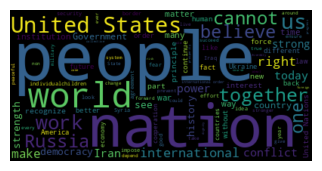

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = df.query("year==2015 and country=='USA'")['text'].values[0]

plt.figure(figsize=(4, 2)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [ ]:
from wordcloud import WordCloud ###
from collections import Counter ###

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

  0%|          | 0/193 [00:00<?, ?it/s]

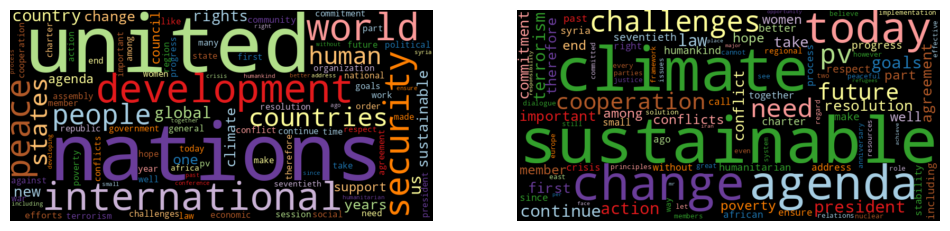

In [ ]:
freq_2015_df = count_words(df[df['year']==2015])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)###
wordcloud(freq_2015_df['freq'], max_words=100)
plt.subplot(1,2,2)###
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=freq_df.head(50).index)
#plt.tight_layout()###

## Question 4: 

Counting seems to be a significant issue for feminist scholars. On the one hand, being counted is a political act (as we remember from the readings in Week 4 as well as in Mandell's chapter that we read for this week). How do the kinds of counting that we can do with text analysis create challenges for the feminist scholar according to Laura Mandell? How do you see what she describes at play in these blueprint text processes? 

## Answer 4:

Laura Mandell's chapter on "Feminist Digital Humanities" discusses the challenges of counting in digital text analysis from a feminist perspective. Mandell argues that traditional counting methods may reproduce existing power structures by focusing on dominant voices and perspectives, while overlooking marginalized groups and their contributions.

Mandell notes that text analysis tools can replicate and reinforce existing biases in several ways. For example, certain words or phrases may be weighted more heavily than others, leading to inaccurate representations of the text. In addition, the algorithms used in text analysis may be biased towards certain types of texts or genres, further perpetuating existing power dynamics.

In the context of the Blueprints text analysis process, these issues may arise in several ways. For example, if the researchers use a standard stop word list that does not account for the unique language or terminology used by marginalized groups, they may inadvertently exclude important information and perspectives from the analysis. Similarly, if the researchers do not carefully consider the context and historical background of the text being analyzed, they may miss important nuances and subtexts that are crucial to understanding the meaning and significance of the text.

To address these challenges, feminist scholars may need to adopt more nuanced and intersectional approaches to text analysis. This may involve incorporating qualitative methods and critical interpretation alongside quantitative analysis, as well as engaging in ongoing reflection and critique of the assumptions and biases underlying the text analysis process. Ultimately, by being mindful of the challenges of counting in digital text analysis, feminist scholars can work to create more inclusive and equitable representations of the texts they study.

## Blueprint: Ranking with TF-IDF


In [ ]:
def compute_idf(df, column='tokens', preprocess=None, min_df=2):

    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    # count tokens
    counter = Counter()
    df[column].progress_map(update)

    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df

In [ ]:
idf_df = compute_idf(df)

  0%|          | 0/7507 [00:00<?, ?it/s]

In [ ]:
# Not in book: sample of IDF values
# high IDF means rare (interesting) term
idf_df.sample(5)

,df,idf
token,,
published,241,3.54
martino,2,8.33
mandela-de,3,7.92
pond,3,7.92
horacio,2,8.33


In [ ]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

In [ ]:
# not in book: for more data: joining is faster
freq_df = freq_df.join(idf_df)
freq_df['tfidf'] = freq_df['freq'] * freq_df['idf']

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

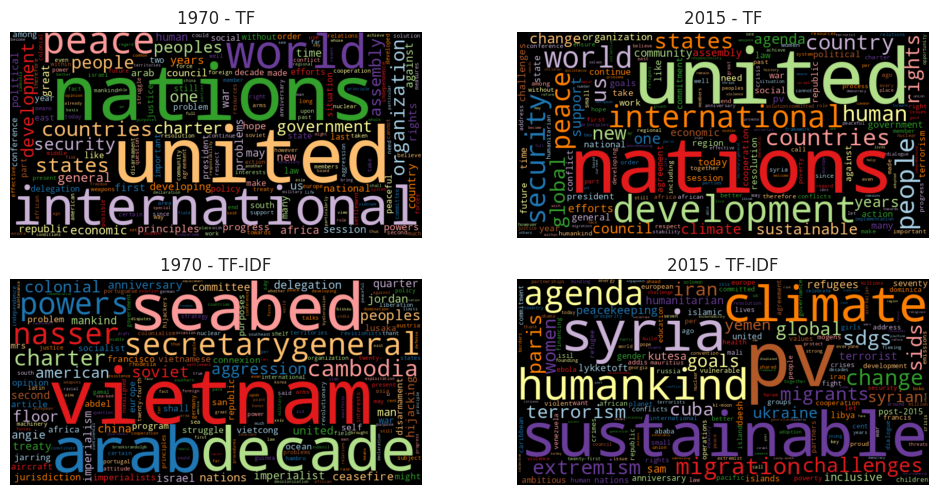

In [ ]:
freq_1970 = count_words(df[df['year'] == 1970])
freq_2015 = count_words(df[df['year'] == 2015])

freq_1970['tfidf'] = freq_1970['freq'] * idf_df['idf']
freq_2015['tfidf'] = freq_2015['freq'] * idf_df['idf']

plt.figure(figsize=(12,6)) ###
#wordcloud(freq_df['freq'], title='All years', subplot=(1,3,1))
plt.subplot(2,2,1)###
wordcloud(freq_1970['freq'], title='1970 - TF', 
          stopwords=['twenty-fifth', 'twenty-five'])
plt.subplot(2,2,2)###
wordcloud(freq_2015['freq'], title='2015 - TF', 
          stopwords=['seventieth'])
plt.subplot(2,2,3)###
wordcloud(freq_1970['tfidf'], title='1970 - TF-IDF', 
          stopwords=['twenty-fifth', 'twenty-five', 'twenty', 'fifth'])
plt.subplot(2,2,4)###
wordcloud(freq_2015['tfidf'], title='2015 - TF-IDF', 
          stopwords=['seventieth'])

## Question 5: 

What is the attraction to scholars like Ted Underwood in the ability to make use of classification analyses like TF-IDF? What kinds of questions could be asked of a text corpora using an unsupervised classification study like the one above? 

## Answer 5:
TF-IDF identifies patterns and relationships in large text corpora that would be difficult or impossible to discern through manual reading or other qualitative methods. This method weights the importance of terms in a document by the frequently they appear in the text (term frequency) and how rare they are across the entire corpus (inverse document frequency). It helps to identify the most significant words in a text, excluding the most rare, and the most common ones. Some of the questions this method help to answer:
* common words
* rare words/ outliers
* relationships between certain terms or phrases

# Blueprint: Finding a Keyword in Context (KWIC)


**Note:** textacy's API had major changes from version 0.10.1 (as used in the book) to 0.11.  
Here, `textacy.text_utils.KWIC` became `textacy.extract.kwic.keyword_in_context` (see [textacy documentation](https://textacy.readthedocs.io/en/latest/api_reference/extract.html#module-textacy.extract.kwic)).




In [ ]:
import textacy

if textacy.__version__ < '0.11': # as in printed book
    from textacy.text_utils import KWIC
    
else: # for textacy 0.11.x
    from textacy.extract.kwic import keyword_in_context

    def KWIC(*args, **kwargs):
        # call keyword_in_context with all params except 'print_only'
        return keyword_in_context(*args, 
                           **{kw: arg for kw, arg in kwargs.items() 
                            if kw != 'print_only'})

In [ ]:
def kwic(doc_series, keyword, window=35, print_samples=5):

    def add_kwic(text):
        kwic_list.extend(KWIC(text, keyword, ignore_case=True, 
                              window_width=window, print_only=False))

    kwic_list = []
    doc_series.progress_map(add_kwic)

    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0])+'  '+ \
                  sample[1]+'  '+\
                  re.sub(r'[\n\t]', ' ', sample[2]))

In [ ]:
random.seed(22) ###
kwic(df[df['year'] == 2015]['text'], 'sdgs', print_samples=5)

  0%|          | 0/193 [00:00<?, ?it/s]

5 random samples out of 73 contexts for 'sdgs':
 of our planet and its people. The   SDGs   are a tangible manifestation of th
nd, we are expected to achieve the   SDGs   and to demonstrate dramatic develo
ead by example in implementing the   SDGs   in Bangladesh. Attaching due impor
the Sustainable Development Goals (  SDGs  ). We applaud all the Chairs of the
new Sustainable Development Goals (  SDGs  ) aspire to that same vision. The A


# Blueprint: Analyzing N-Grams


In [ ]:
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("|".join(ngrams(tokens, 2)))

the visible|visible manifestation|manifestation of|of the|the global|global climate|climate change


In [ ]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
            if len([t for t in ngram if t in stopwords])==0]

print("Bigrams:", "|".join(ngrams(tokens, 2, stopwords=stopwords)))
print("Trigrams:", "|".join(ngrams(tokens, 3, stopwords=stopwords)))

Bigrams: visible manifestation|global climate|climate change
Trigrams: global climate change


In [ ]:
df['bigrams'] = df['text'].progress_apply(prepare, pipeline=[str.lower, tokenize]) \
                          .progress_apply(ngrams, n=2, stopwords=stopwords)

count_words(df, 'bigrams').head(5)

  0%|          | 0/7507 [00:00<?, ?it/s]

  0%|          | 0/7507 [00:00<?, ?it/s]

  0%|          | 0/7507 [00:00<?, ?it/s]

,freq
token,
united nations,103236
international community,27786
general assembly,27096
security council,20961
human rights,19856


In [ ]:
idf_df = compute_idf(df) ### re-initialize to be safe
# concatenate existing IDF data frame with bigram IDFs
idf_df = pd.concat([idf_df, compute_idf(df, 'bigrams', min_df=10)])

freq_df = count_words(df[df['year'] == 2015], 'bigrams')
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

  0%|          | 0/7507 [00:00<?, ?it/s]

  0%|          | 0/7507 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

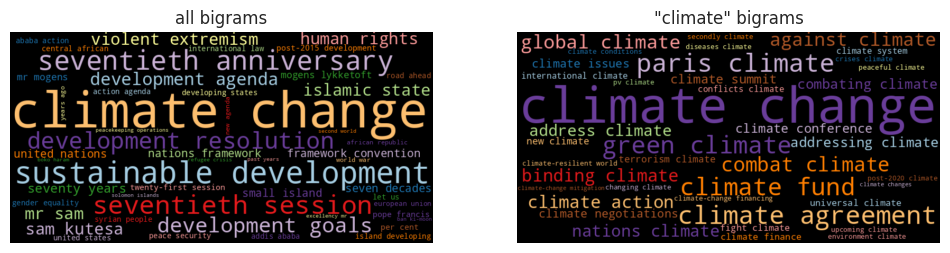

In [ ]:
plt.figure(figsize=(12,6)) ###
plt.subplot(1,2,1) ###
wordcloud(freq_df['tfidf'], title='all bigrams', max_words=50)

plt.subplot(1,2,2) ###
# plt.tight_layout() ###
where = freq_df.index.str.contains('climate')
wordcloud(freq_df[where]['freq'], title='"climate" bigrams', max_words=50)

# Blueprint: Comparing Frequencies across Time-Intervals and Categories


## Creating Frequency Timelines


In [ ]:
def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [ ]:
keywords = ['nuclear', 'terrorism', 'climate', 'freedom']
tokens = ['nuclear', 'climate', 'climate', 'freedom', 'climate', 'freedom']

print(count_keywords(tokens, keywords))

[1, 0, 3, 2]


In [ ]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].progress_apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

In [ ]:
freq_df = count_keywords_by(df, by='year', keywords=keywords)

  0%|          | 0/7507 [00:00<?, ?it/s]

In [ ]:
pd.options.display.max_rows = 4

In [ ]:
pd.options.display.max_rows = 60

<Axes: xlabel='year'>

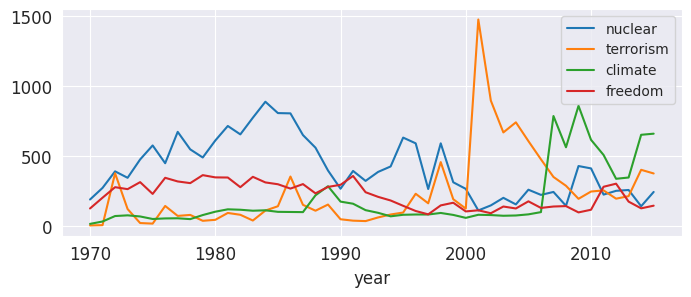

In [ ]:
freq_df.plot(kind='line', figsize=(8, 3))

In [ ]:
random.seed(23) ###
# analyzing mentions of 'climate' before 1980
kwic(df.query('year < 1980')['text'], 'climate', window=35, print_samples=5)

  0%|          | 0/1245 [00:00<?, ?it/s]

5 random samples out of 581 contexts for 'climate':
ation with a view to replacing the   climate   of fear, mistrust and hatred by to
ntributing to the maintenance of a   climate   of peace, harmony and understandin
ges in the international political   climate  . There is increasing awareness of 
rian-Israeli front, have created a   climate   which favors the continuation of n
 that, far from noting a promising   climate   in the most critical areas of inte


## Creating Frequency Heat Maps


  0%|          | 0/7507 [00:00<?, ?it/s]

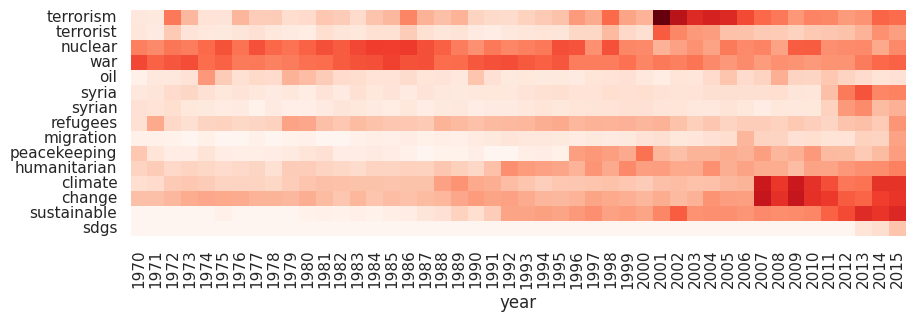

In [ ]:
keywords = ['terrorism', 'terrorist', 'nuclear', 'war', 'oil',
            'syria', 'syrian', 'refugees', 'migration', 'peacekeeping', 
            'humanitarian', 'climate', 'change', 'sustainable', 'sdgs']  

freq_df = count_keywords_by(df, by='year', keywords=keywords)

# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)

plt.figure(figsize=(10, 3)) ###
sns.set(font_scale=1) ###
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1) ###

# Closing Remarks


## Question 6: 

What is the value of exploratory analysis in computational text analysis? How can it be helpful? In what ways is it insufficient? 

##Answer 6:
Exploratory analysis is the process of getting familiar with the dataset in terms of counts, proportion, distribution, relationship among variables, and other techniques that allow researchers to create a roadmap for modeling. It basically help researchers to identify new research questions and hypotheses that they may not have considered otherwise. 

In terms of text analysis, it envolves visualizing the words into unigrams, bigrams, trigrams (and so on), identifying topics or themes that are common across multiple texts. The limitations envolve not using it to jump to conclusions or make definitive statements about the data before modeling and having a more deeper analysis.